# Sistemas de recomendación

#### Filtro Colaborativo

Técnica utilizada por algunos sistemas recomendadores, los cuales  suelen incluir conjuntos de datos muy grandes. Hay dos tipos de filtros colaborativos:

+ Basados en Usuarios (User-based):

Se basan en una premisa simple de similitud entre gustos, es decir, en que si una persona A tiene la misma opinión que una persona B sobre un tema, A es más probable que tenga la misma opinión que B en otro tema diferente que la opinión que tendría una persona elegida azar. 

Tiene ciertos inconvenientes. 
Requiere evaluaciones previas, sin algunas evaluaciones de usuarios, no se tienen pistas sobre las evaluaciones de los nuevos usuarios.
No es una matriz densa, usualmente los usuarios dan su rating sobre algunos items y no sobre toda la base de datos, lo que puede dificultar algunos casos por falta de datos pero puede ayudar ya que no se tiene que hacer los cálculos para todas las combinaciones posibles.
Altos costos si los perfiles de usuarios cambian, si los gustos cambian o hay ruido en los datos (ejemplo, 2 personas usan la misma cuenta en el sistema) todo el modelo del sistema debe ser recalculado.

+ Basados en Items (Items-based):

Buscan la similitud entre elementos, utilizan distribuciones de calificación por artículo, no por usuario, lo que puede ayudar a sobrellevar algunos de los problemas de los modelos User-based. Con más usuarios que elementos, cada elemento tiende a tener más calificaciones que cada usuario, por lo que la calificación promedio de un elemento generalmente no cambia rápidamente. Esto conduce a distribuciones de calificación más estables en el modelo, por lo que no es necesario reconstruir el modelo con tanta frecuencia. Cuando los usuarios consumen y luego califican un artículo, los elementos similares de ese elemento se seleccionan del modelo de sistema existente y se agregan a las recomendaciones del usuario.

### Ejemplo Peliculas (User-based)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.spatial.distance import pdist       # calcula distancias entre puntos
from scipy.spatial.distance import squareform  # convierte a una matriz cuadrada

In [3]:
ratings=pd.read_csv('data/movie_ratings.csv').set_index('Movie')
ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1


In [4]:
def plot(m1, m2):
    
    x=ratings.T[m1]  # ratings de las peliculas
    y=ratings.T[m2]
    
    n=list(ratings.T.index)  # nombres de los usuarios
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x, y, s=0) # scatter vacio...para luego poner los nombres
    
    plt.title('Espacio para {} VS. {}'.format(m1, m2), fontsize=14)
    plt.xlabel(m1, fontsize=14)
    plt.ylabel(m2, fontsize=14)
    
    for i,e in enumerate(n):
        plt.annotate(e, (x[i], y[i]), fontsize=12)  # se escribe el nombre en las posiciones correspondientes
    plt.show();

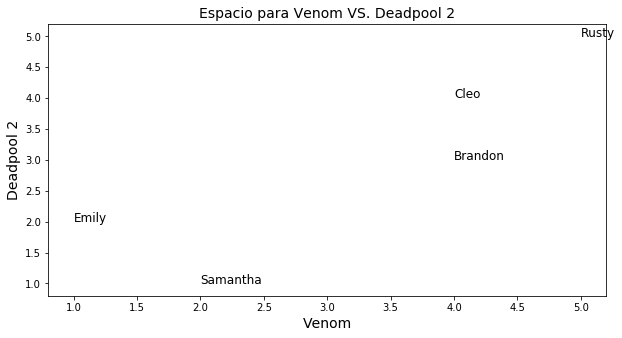

In [5]:
plot('Venom', 'Deadpool 2')

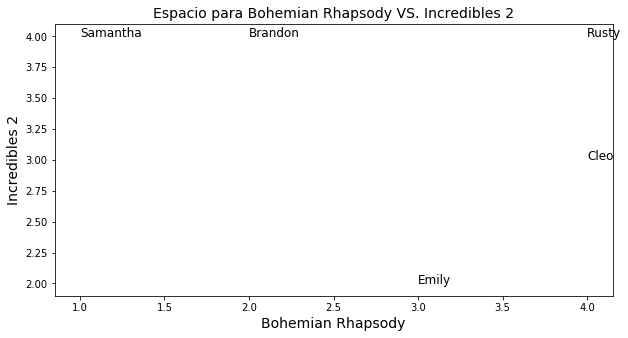

In [6]:
plot('Bohemian Rhapsody', 'Incredibles 2')

In [7]:
distancias=squareform(pdist(ratings.T, 'euclidean'))    # distancia entre usuarios

distancias   # pertenecen al intervalo [0, +inf)

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [9]:
similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

similitudes  # pertenecen al intervalo (0, 1)

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


##### metricas de distancia

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.distance.html

**euclidea**

$$d=\sqrt{x^2 + y^2}$$

$$d=\sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}$$

**cityblock - manhattan**

$$d=x + y$$

**similitud del coseno**

In [11]:
%matplotlib inline
import scipy.spatial.distance as distance
import numpy as np
import math

**producto escalar**

$$(1, 2, 3)·(2, 1, 1)= 1*2 + 2*1 + 3*1 =7$$

In [12]:
def dot(v1, v2):
    return sum(map(lambda x: x[0]*x[1], zip(v1,v2)))

$$\cos{\theta}=\frac{v1·v2}{|v1|·|v2|}$$

donde:

$|V1|=\sqrt{x_1^2+x_2^2+x_3^2}$

In [13]:
def similitud_coseno(v1, v2):
    
    prod=dot(v1, v2)
    
    len1=math.sqrt(dot(v1, v1))
    len2=math.sqrt(dot(v2, v2))
    
    return prod/(len1*len2)

In [14]:
def plot_v(v):
    origen=(0,0)
    #plt.figure(figsize=(10,5))
    plt.quiver(*origen, v[0,0], v[0,1], color=['r'], scale=60)
    plt.quiver(*origen, v[1,0], v[1,1], color=['b'], scale=60)
    a=v[0]
    b=v[1]
    sim_cos=similitud_coseno(a, b)
    sim_euc=distance.euclidean(a, b)
    tit='Coseno: {}, Euclidea: {}'.format(sim_cos.round(2), sim_euc.round(2))
    plt.title(tit)
    plt.grid()
    plt.legend(['A', 'B'])

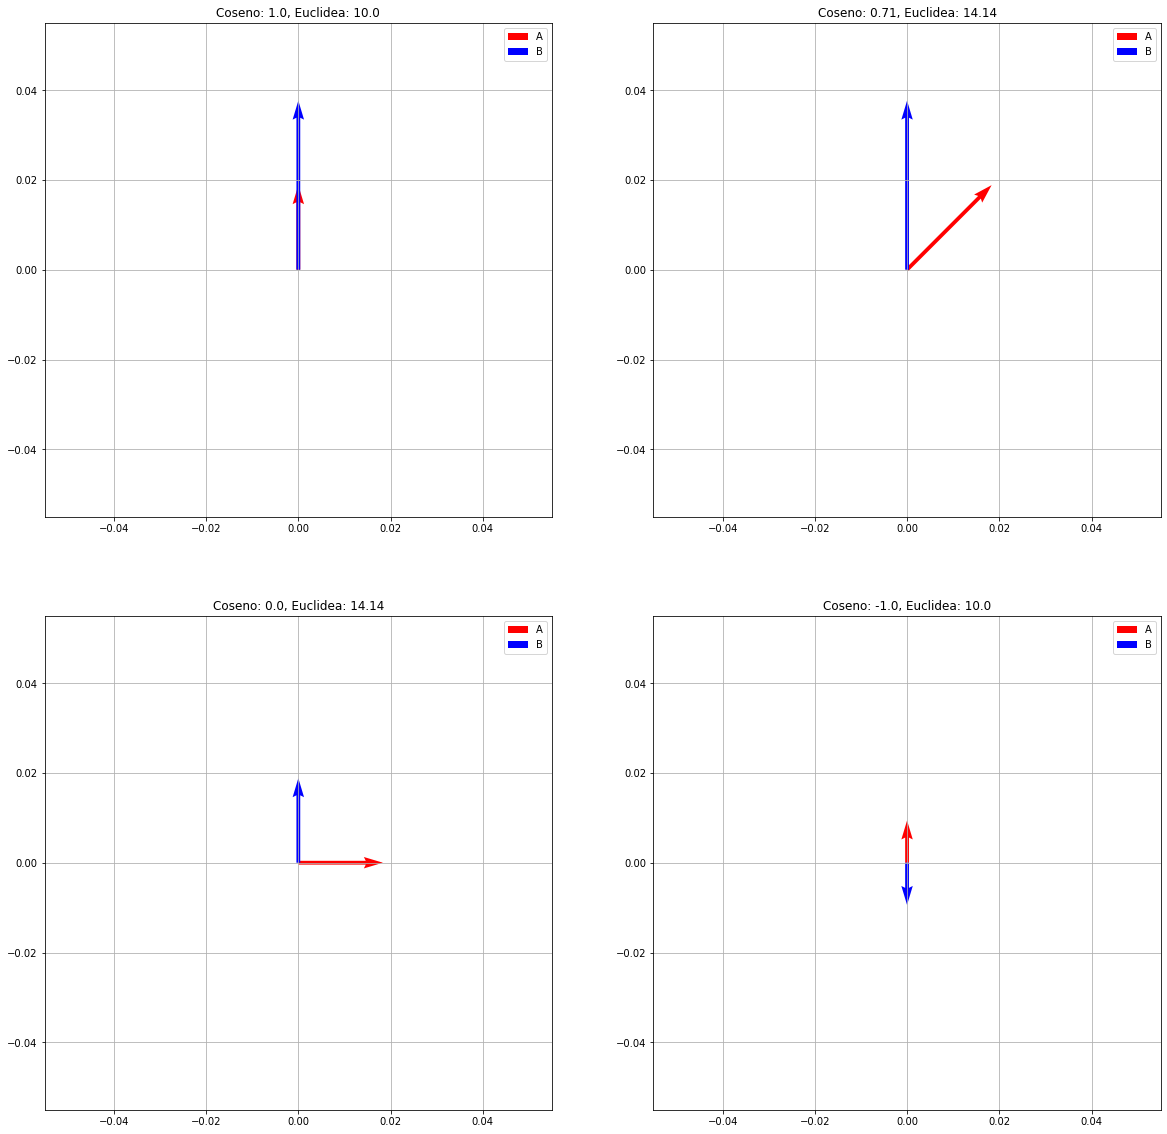

In [15]:
plt.figure(figsize=(20,20))

# caso 1
v=np.array([[0,10], [0, 20]])
plt.subplot(2,2,1)
plot_v(v)

# caso 2
v=np.array([[10,10], [0, 20]])
plt.subplot(2,2,2)
plot_v(v)

# caso 3
v=np.array([[10,0], [0, 10]])
plt.subplot(2,2,3)
plot_v(v)

# caso 4
v=np.array([[0,5], [0, -5]])
plt.subplot(2,2,4)
plot_v(v)

### Generar recomendaciones

In [16]:
tom={'Aquaman': 2, 
     'Avengers: Infinity War':1, 
     'Black Panther':5,
     'Bohemian Rhapsody':5, 
     'Deadpool 2':2,
     'Fantastic Beasts: The Crimes of Grindelwald':3, 
     'Incredibles 2':3,
     'Jurassic World: Fallen Kingdom':4, 
     'Mission: Impossible – Fallout':3,
     'Venom':3}

In [17]:
ratings['Tom']=pd.Series(tom)

distancias=squareform(pdist(ratings.T, 'euclidean')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

similitudes

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [19]:
n_ratings=pd.read_csv('data/movie_ratings2.csv').set_index('Movie')

n_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


#### Score de similitud

In [20]:
simil_score=similitudes['Tom'].sort_values(ascending=False)[1:]

reco=n_ratings.copy()

for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
    
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [21]:
# con otra metrica

distancias=squareform(pdist(ratings.T, 'cosine')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitudes['Tom'].sort_values(ascending=False)[1:]

reco=n_ratings.copy()

for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
    
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,3.615951,2.511274,3.809728,2.532334,3.168375,15.637662
Despicable Me 3,3.615951,4.185457,4.762161,0.844111,1.584187,14.991867
Thor: Ragnarok,3.615951,2.511274,3.809728,0.844111,3.960468,14.741533
Wolf Warrior 2,4.519939,2.511274,1.904864,2.532334,3.168375,14.636786
Jumanji: Welcome to the Jungle,3.615951,2.511274,2.857296,1.688222,3.960468,14.633212
Guardians of the Galaxy Vol. 2,3.615951,0.837091,4.762161,3.376445,1.584187,14.175835
Spider-Man: Homecoming,0.903988,2.511274,4.762161,1.688222,3.960468,13.826113
Beauty and the Beast,1.807976,4.185457,1.904864,4.220556,1.584187,13.703040
Star Wars: The Last Jedi,4.519939,3.348365,0.952432,1.688222,1.584187,12.093146


In [22]:
distancias=squareform(pdist(ratings.T, 'cityblock')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitudes['Tom'].sort_values(ascending=False)[1:]

reco=n_ratings.copy()

for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
    
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,0.2500,0.166667,0.4,0.176471,0.20,1.193137
Despicable Me 3,0.2500,0.277778,0.5,0.058824,0.10,1.186601
Guardians of the Galaxy Vol. 2,0.2500,0.055556,0.5,0.235294,0.10,1.140850
Thor: Ragnarok,0.2500,0.166667,0.4,0.058824,0.25,1.125490
Spider-Man: Homecoming,0.0625,0.166667,0.5,0.117647,0.25,1.096814
Jumanji: Welcome to the Jungle,0.2500,0.166667,0.3,0.117647,0.25,1.084314
Wolf Warrior 2,0.3125,0.166667,0.2,0.176471,0.20,1.055637
Beauty and the Beast,0.1250,0.277778,0.2,0.294118,0.10,0.996895
Star Wars: The Last Jedi,0.3125,0.222222,0.1,0.117647,0.10,0.852369


In [24]:
distancias=squareform(pdist(ratings.T, 'canberra')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitudes['Tom'].sort_values(ascending=False)[1:]

reco=n_ratings.copy()

for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
    
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,1.171548,0.766423,1.495549,0.865583,0.943997,5.243100
Despicable Me 3,1.171548,1.277372,1.869436,0.288528,0.471999,5.078883
Guardians of the Galaxy Vol. 2,1.171548,0.255474,1.869436,1.154110,0.471999,4.922568
Thor: Ragnarok,1.171548,0.766423,1.495549,0.288528,1.179996,4.902044
Jumanji: Welcome to the Jungle,1.171548,0.766423,1.121662,0.577055,1.179996,4.816685
Wolf Warrior 2,1.464435,0.766423,0.747774,0.865583,0.943997,4.788213
Spider-Man: Homecoming,0.292887,0.766423,1.869436,0.577055,1.179996,4.685798
Beauty and the Beast,0.585774,1.277372,0.747774,1.442638,0.471999,4.525557
Star Wars: The Last Jedi,1.464435,1.021898,0.373887,0.577055,0.471999,3.909274


In [26]:
distancias=squareform(pdist(ratings.T, 'jaccard')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitudes['Tom'].sort_values(ascending=False)[1:]

reco=n_ratings.copy()

for n,s in dict(simil_score).items():
    reco[n]=reco[n]*s
    
reco['Total']=reco.sum(axis=1)
reco.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,2.105263,1.578947,2.352941,1.764706,2.105263,9.907121
Despicable Me 3,2.105263,2.631579,2.941176,0.588235,1.052632,9.318885
Jumanji: Welcome to the Jungle,2.105263,1.578947,1.764706,1.176471,2.631579,9.256966
Thor: Ragnarok,2.105263,1.578947,2.352941,0.588235,2.631579,9.256966
Wolf Warrior 2,2.631579,1.578947,1.176471,1.764706,2.105263,9.256966
Guardians of the Galaxy Vol. 2,2.105263,0.526316,2.941176,2.352941,1.052632,8.978328
Beauty and the Beast,1.052632,2.631579,1.176471,2.941176,1.052632,8.854489
Spider-Man: Homecoming,0.526316,1.578947,2.941176,1.176471,2.631579,8.854489
Star Wars: The Last Jedi,2.631579,2.105263,0.588235,1.176471,1.052632,7.554180


# Survival Analysis

Originalmente diseñado para cuantificar y medir la esperanza de vida de un individuo, por ejemplo, si queremos conocer la probabilidad de mortalidad si se contrae cierta enfermedad. Se puede usar para varios propósitos: esperanza de vida, fallos mecánicos, retención de clientes o para estimar el periodo de recuperación de una enfermedad.

Hay tres requerimientos:
+ Campo con el número de veces que ocurre el evento (un count)
+ Campo temporal
+ Campo de agrupación


**Estimador Kaplan-Meier**

https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator



$$S(t) = \prod_{i:t_i<t}(1-\frac{d_i}{n_i})$$


donde :

$d_i = $ número de muertes

$n_i = $ número de individuos

In [27]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

In [28]:
data=pd.read_csv('data/churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [29]:
data.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [30]:
from lifelines import KaplanMeierFitter

In [31]:
def survival(data, group_field, time_field, event_field):
    model = KaplanMeierFitter()
    results = []
    
    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        model.fit(T, E, label=str(i))
        results.append(model.survival_function_)
    
    survival = pd.concat(results, axis=1)
    return survival

In [32]:
rates=survival(data, 'gender', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Permanencia(meses)', yTitle='Tasa de retencion',
            title='Tasa de retencion por genero y permanencia')

In [33]:
rates=survival(data, 'SeniorCitizen', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Permanencia(meses)', yTitle='Tasa de retencion',
            title='Tasa de retencion por jubilacion y permanencia')

In [34]:
rates=survival(data, 'InternetService', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Permanencia(meses)', yTitle='Tasa de retencion',
            title='Tasa de retencion por servicio y permanencia')

In [35]:
rates=survival(data, 'Contract', 'tenure', 'ChurnBinary')

rates.iplot(kind='line', xTitle='Permanencia(meses)', yTitle='Tasa de retencion',
            title='Tasa de retencion por contrato y permanencia')

# Flask

In [36]:
from flask import Flask
from flask import request

import pandas as pd
import os


app=Flask(__name__)   # inicializar la aplicacion de conexion

#PATH=os.path.dirname(os.path.abspath(__file__))

media=0  # inicializa variables



@app.before_first_request  # antes del primer requests
def startup():
    global media   # variable global media
    
    # media=pd.read_csv(PATH+'/data/auto-mpg.csv').cylinders.mean()
    media=pd.read_csv('data/auto-mpg.csv').cylinders.mean()

    

@app.route('/')  # ruta de la url
def resta():
    
    # parametros
    p1=float(request.args.get('p1'))
    p2=float(request.args.get('p2'))
    p3=float(request.args.get('p3'))
    
    resta=p1-p2-3*p3
    
    s='Resta:{:.2f}'.format(resta)
    
    return s


@app.route('/media/')  # ruta url a otra parte de la pagina
def suma():
    s='Media:{}'.format(media)
    return s



if __name__=='__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2020-04-24 12:14:51,982] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/data/Library/Python/3.7/lib/python/site-packages/flask/app.py", line 1935, in dispatch_request
    return self

In [37]:
import requests as req

In [39]:
url='http://yon.pythonanywhere.com/media/'

req.get(url).text

'Media:5.454773869346734'

In [40]:
url='http://yon.pythonanywhere.com/?p1=3&p2=1&p3=0.2'

req.get(url).text

'Resta:1.40'

In [56]:
url='http://yon.pythonanywhere.com/api/'

req.get(url).text

"[{'suma':4, 'resta':2, 'hola':'adios', 'media':3},{'suma':45464,'resta':23663,'multi':9534875,'hola':'adios'}]"

# MongoDB Atlas

In [59]:
import pymongo

def token(token):
    with open(token, 'r') as f:
        t=f.readlines()[0].split('\n')[0]
    return t

In [60]:
cliente=pymongo.MongoClient('mongodb+srv://Yonatan:{}@mambacluster-v9uol.mongodb.net/test?retryWrites=true&w=majority'.format(token('mongoatlas.txt')))

In [62]:
db=cliente.test

original=db.original

cursor=original.find()

list(cursor)

[{'_id': ObjectId('5cf3e1183a7800c1562030b7'), 'palabra': 'uva'},
 {'_id': ObjectId('5cf3e35bd1de689353014d5c'), 'palabra': 'mesa'},
 {'_id': ObjectId('5cf3e3e6b0a76bee22ea612b'), 'palabra': 'hola'},
 {'_id': ObjectId('5cf3e74e63cabafc30f6798c'), 'palabra': 'gafe'},
 {'_id': ObjectId('5cf3f36f05d169b62ef1d50e'), 'palabra': 'bar'},
 {'_id': ObjectId('5cf3fc73931b4025336e0ef1'), 'palabra': 'gato'},
 {'_id': ObjectId('5cf3fd7958bd7ab9c47745cd'), 'palabra': 'aqui'},
 {'_id': ObjectId('5cf4c4dd66a686bc29d94b1c'), 'palabra': 'hacer'},
 {'_id': ObjectId('5cf4c826d087f7a3044ce4d3'), 'palabra': 'birra'},
 {'_id': ObjectId('5d3428c8bd52ce9cb6114331'), 'palabra': 'uwa'},
 {'_id': ObjectId('5ddc2623f58bafe243ef57ca'),
  'palabra': 'no se ha reconocido la imagen, ha fallado el ordenado de open c v'}]